In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [109]:
# Because my Jupyter was showing only last line output, so need to add
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [110]:
# read train and testing data

train = pd.read_csv("train_clean.csv")
test = pd.read_csv("test_clean.csv")
testID = test['Id']
train.head()
test.head()

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,...,34,0,0,0,0,0,3,2010,WD,Normal
3,3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,...,36,0,0,0,0,0,6,2010,WD,Normal
4,4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,...,82,0,0,144,0,0,1,2010,WD,Normal


In [111]:
train.columns
train.shape
test.shape

Index(['Unnamed: 0', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive'

(1460, 77)

(1459, 77)

In [112]:
train.dtypes

Unnamed: 0         int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 77, dtype: object

In [113]:
# replace NaN value! If striing column, then using mode otherwise median
for col in train:
    if train[col].dtype == 'object':
        train[col] = train[col].fillna(train[col].mode())
    else:
        train[col] = train[col].fillna(train[col].median())

In [114]:
from sklearn.preprocessing import LabelEncoder


def label_encoding(df_train,df_test):
    le_count=0;
    for col in df_train:
        if df_train[col].dtype == 'object':
            if len(list(df_train[col].unique())) <= 2:
                le = LabelEncoder()
                le.fit(list(df_train[col].unique())+list(df_test[col].unique()))

                df_train[col] = le.transform(df_train[col].astype(str))
                df_test[col] = le.transform(df_test[col].astype(str))
                le_count +=1;
               
    
    print("Total label encoded columns : %d " %le_count)

In [115]:
label_encoding(train,test)
train.shape
test.shape

Total label encoded columns : 3 


(1460, 77)

(1459, 77)

In [116]:
import copy

train_objs_num = len(train)
dataset = pd.concat(objs=[train, test], axis=0)
dataset = pd.get_dummies(dataset)
train = copy.copy(dataset[:train_objs_num])
test = copy.copy(dataset[train_objs_num:])
test = test.drop(['SalePrice'],axis=1)
train.shape
test.shape

(1460, 275)

(1459, 274)

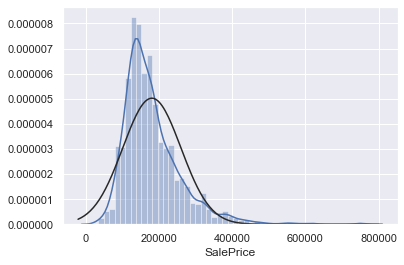

In [117]:
# display the distribution of salePrice
from scipy.stats import norm
sns.distplot(train['SalePrice'],fit=norm)

In [118]:
corr = train.corr()

In [119]:
corr = corr.sort_values('SalePrice')
cols = corr['SalePrice'][corr['SalePrice'].values > 0.2].index.values

In [120]:
cols

array(['BsmtUnfSF', 'Neighborhood_StoneBr', 'LotShape_IR1',
       'BsmtFullBath', 'PavedDrive_Y', 'GarageType_Attchd', 'BsmtQual_Gd',
       'GarageType_BuiltIn', 'RoofStyle_Hip', 'Electrical_SBrkr',
       'HouseStyle_2Story', 'MSZoning_RL', 'CentralAir', 'FireplaceQu_Ex',
       'LotArea', 'HalfBath', 'Exterior1st_VinylSd',
       'Exterior2nd_VinylSd', 'BsmtExposure_Gd', 'OpenPorchSF',
       '2ndFlrSF', 'KitchenQual_Gd', 'WoodDeckSF', 'Neighborhood_NoRidge',
       'MasVnrType_Stone', 'LotFrontage', 'SaleCondition_Partial',
       'SaleType_New', 'BsmtFinSF1', 'Neighborhood_NridgHt',
       'GarageFinish_Fin', 'HeatingQC_Ex', 'BsmtFinType1_GLQ',
       'ExterQual_Ex', 'ExterQual_Gd', 'GarageYrBlt', 'Fireplaces',
       'MasVnrArea', 'Foundation_PConc', 'KitchenQual_Ex', 'YearRemodAdd',
       'YearBuilt', 'TotRmsAbvGrd', 'BsmtQual_Ex', 'FullBath', '1stFlrSF',
       'TotalBsmtSF', 'GarageArea', 'GarageCars', 'GrLivArea',
       'OverallQual', 'SalePrice'], dtype=object)

<Figure size 1152x1152 with 0 Axes>

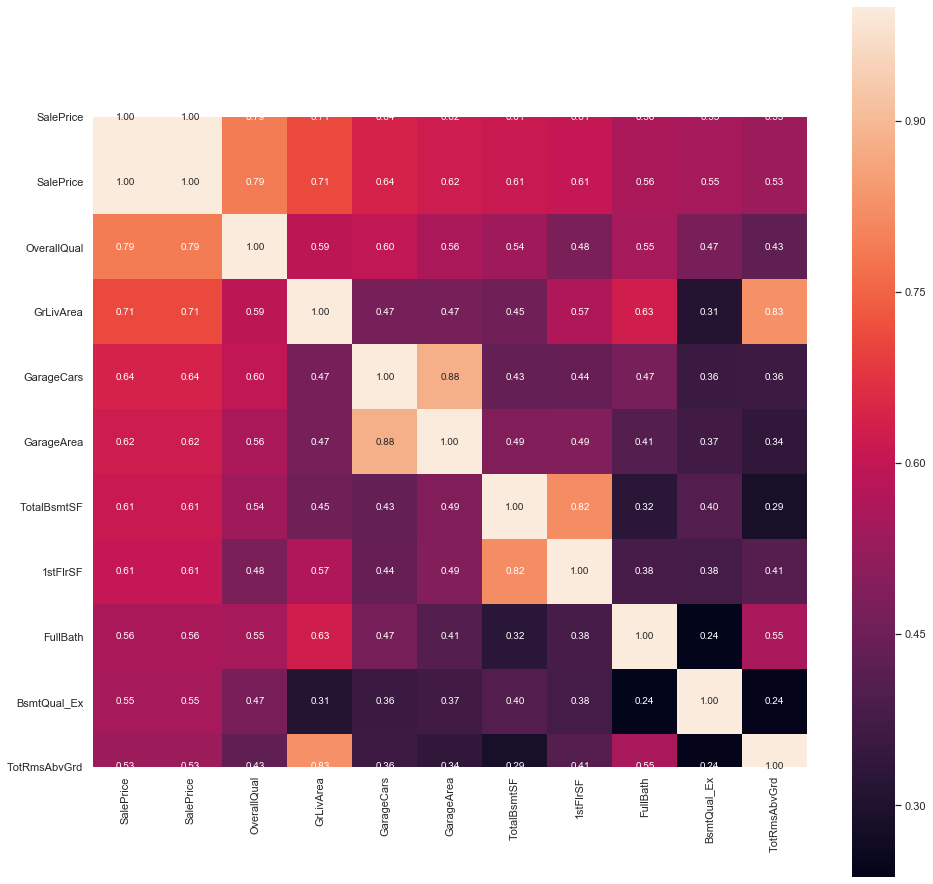

In [121]:
heatMapCols=np.append(cols[-10:], np.array(['SalePrice']))
cm = np.corrcoef(train[heatMapCols[::-1]].T)
plt.figure(figsize=(16,16))
sns.set(font_scale=1)
with sns.axes_style("white"):
    sns.heatmap(cm,yticklabels=heatMapCols[::-1],xticklabels=heatMapCols[::-1],fmt='.2f',annot_kws={'size':10},annot=True,square=True,cmap=None)

In [122]:
train_label = train['SalePrice']

cols = np.delete(cols,len(cols)-1)

train_sample = train[cols]

test_sample = test[cols]

In [123]:
test_sample.head()
train_sample.head()

,BsmtUnfSF,Neighborhood_StoneBr,LotShape_IR1,BsmtFullBath,PavedDrive_Y,GarageType_Attchd,BsmtQual_Gd,GarageType_BuiltIn,RoofStyle_Hip,Electrical_SBrkr,...,YearBuilt,TotRmsAbvGrd,BsmtQual_Ex,FullBath,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual
0,270.0,0,0,0.0,1,1,0,0,0,1,...,1961,5,0,1,896,882.0,730.0,1.0,896,5
1,406.0,0,1,0.0,1,1,0,0,1,1,...,1958,6,0,1,1329,1329.0,312.0,1.0,1329,6
2,137.0,0,1,0.0,1,1,1,0,0,1,...,1997,6,0,2,928,928.0,482.0,2.0,1629,5
3,324.0,0,1,0.0,1,1,0,0,0,1,...,1998,7,0,2,926,926.0,470.0,2.0,1604,6
4,1017.0,1,1,0.0,1,1,1,0,0,1,...,1992,5,0,2,1280,1280.0,506.0,2.0,1280,8


,BsmtUnfSF,Neighborhood_StoneBr,LotShape_IR1,BsmtFullBath,PavedDrive_Y,GarageType_Attchd,BsmtQual_Gd,GarageType_BuiltIn,RoofStyle_Hip,Electrical_SBrkr,...,YearBuilt,TotRmsAbvGrd,BsmtQual_Ex,FullBath,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual
0,150.0,0,0,1.0,1,1,1,0,0,1,...,2003,8,0,2,856,856.0,548.0,2.0,1710,7
1,284.0,0,0,0.0,1,1,1,0,0,1,...,1976,6,0,2,1262,1262.0,460.0,2.0,1262,6
2,434.0,0,1,1.0,1,1,1,0,0,1,...,2001,6,0,2,920,920.0,608.0,2.0,1786,7
3,540.0,0,1,1.0,1,0,0,0,0,1,...,1915,7,0,1,961,756.0,642.0,3.0,1717,7
4,490.0,0,1,1.0,1,1,1,0,0,1,...,2000,9,0,2,1145,1145.0,836.0,3.0,2198,8


In [124]:
from sklearn.preprocessing import  Imputer
imputer = Imputer(strategy = 'median')

imputer.fit(train_sample)

train_sample = imputer.transform(train_sample)
test_sample = imputer.transform(test_sample)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [125]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(train_sample)

train_sample = scaler.transform(train_sample)
test_sample = scaler.transform(test_sample)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [126]:
from sklearn.model_selection import train_test_split

X_train, X_test , y_train, y_test = train_test_split(train_sample,train_label,train_size = 0.8)

In [127]:
X_train.shape
X_test.shape
test_sample.shape

(1168, 51)

(292, 51)

(1459, 51)

In [128]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(train_sample,train_label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [129]:
y_preds = model.predict(X_test)

In [130]:
from sklearn import metrics

print("Root Mean square error: " , np.sqrt(metrics.mean_squared_error(y_test,y_preds)))

Root Mean square error:  29433.3612929805


In [131]:
test_pred = model.predict(test_sample)
submit = pd.DataFrame()
submit['ID'] = testID
submit['SalePrice'] = test_pred
submit.head()

,ID,SalePrice
0,1461,106842.090436
1,1462,159924.090161
2,1463,172795.886208
3,1464,192742.257740
4,1465,228293.948519


In [145]:
submit.to_csv('submission_linear.csv', index = False)